In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D , AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras import datasets, layers, models

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


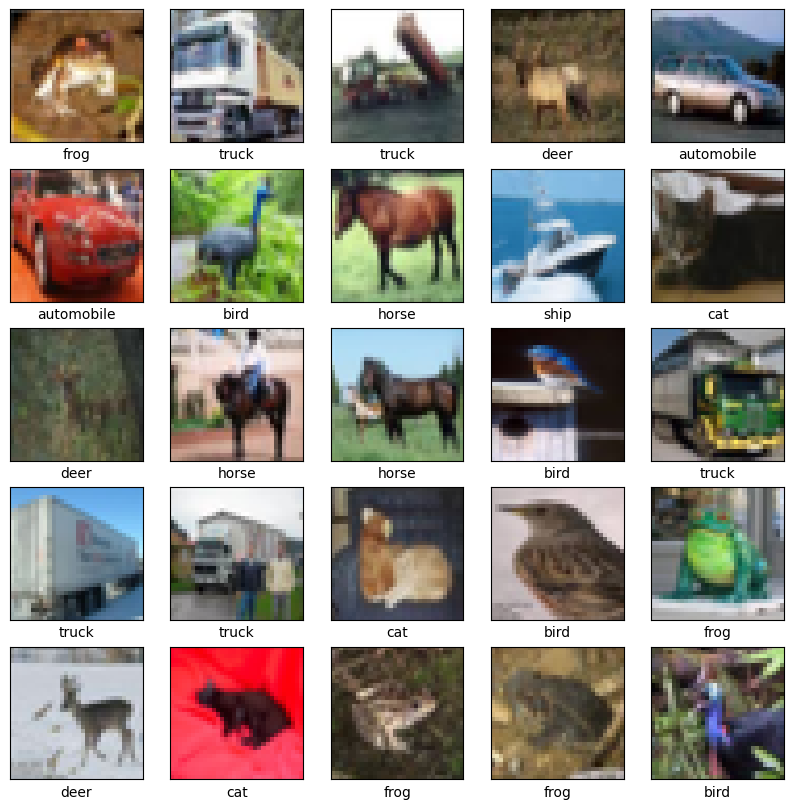

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
train_images.shape , train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [10]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
train_labels.shape

(50000, 10)

In [36]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


modelpath="./best_model.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_images , train_labels , validation_split=0.25, epochs=100, batch_size=1000, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(test_images, test_labels)[1]))


Epoch 1: val_loss improved from inf to 1.82184, saving model to ./best_model.hdf5

Epoch 2: val_loss improved from 1.82184 to 1.60117, saving model to ./best_model.hdf5

Epoch 3: val_loss improved from 1.60117 to 1.45368, saving model to ./best_model.hdf5

Epoch 4: val_loss improved from 1.45368 to 1.36810, saving model to ./best_model.hdf5

Epoch 5: val_loss improved from 1.36810 to 1.28681, saving model to ./best_model.hdf5

Epoch 6: val_loss improved from 1.28681 to 1.22187, saving model to ./best_model.hdf5

Epoch 7: val_loss improved from 1.22187 to 1.18022, saving model to ./best_model.hdf5

Epoch 8: val_loss improved from 1.18022 to 1.12352, saving model to ./best_model.hdf5

Epoch 9: val_loss did not improve from 1.12352

Epoch 10: val_loss improved from 1.12352 to 1.06306, saving model to ./best_model.hdf5

Epoch 11: val_loss improved from 1.06306 to 1.04721, saving model to ./best_model.hdf5

Epoch 12: val_loss improved from 1.04721 to 1.02691, saving model to ./best_model.h

In [37]:
y_vloss = history.history['val_loss'][1:]
y_loss = history.history['loss'][1:]
acc = history.history['accuracy']
acc2 = history.history['val_accuracy']

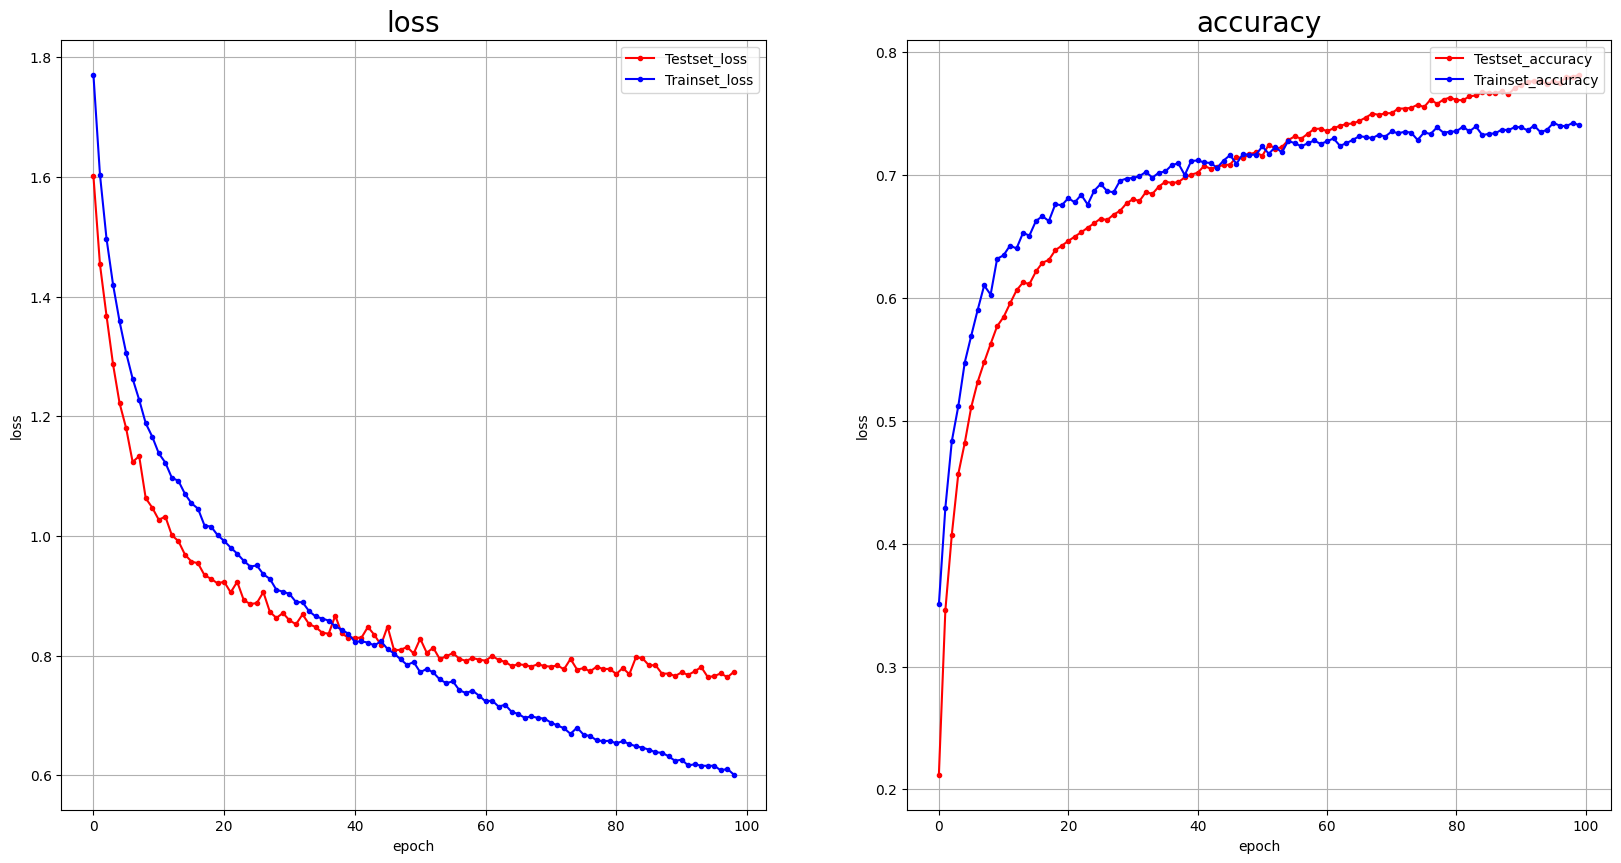

In [38]:
x_len = np.arange(len(y_loss))
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss' , size = 20)

plt.subplot(1,2,2)
x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c="red", label='Testset_accuracy')
plt.plot(x_len, acc2, marker='.', c="blue", label='Trainset_accuracy')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('accuracy' , size = 20)
plt.show()